CREDIT CARD FRAUD DETECTION MODEL

To arrive at this, the below steps would be followed:

1. Reading and Understanding the data.
2. Data Cleansing:
        NUll Check
        DataType Check
3. Data Visualisation:
        Imbalanced Data Checks
        Data Distribution Plots
4. Splitting the data into training and testing sets:
        Stratified Train Test Split
        Skewness Check and Fix
5. Building Logistic Model:
        Logistic Regression on Imbalanced Data
        Random Forest on Imbalanced Data
        XGBoost on Imbalanced Data
        Logistic Regression on Balanced Data (Random Over Sampling,SMOTE,ADASYN)
        Random Forest on Balanced Data (Random Over Sampling,SMOTE,ADASYN)
        XGBoost on Balanced Data (Random Over Sampling,SMOTE,ADASYN)
        Stratified K-Fold and Hyperparameter Tuning
        Classification Report
        Confusion Matrix
        ROC AUC Curve
6. Final Analysis:
        Best Model Selection
        Features Importance
7. Closing Statement

# Step 1: Reading and Understanding the data

In [1]:
# pip install xgboost

In [2]:
# pip install -U imbalanced-learn

In [3]:
# conda install -c conda-forge imbalanced-learn

In [4]:
# pip install sklearn

In [5]:
# from imblearn.metrics import sensitivity_specificity_support

In [6]:
# pip install delayed

In [7]:
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization

pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
# Local file path.Please change the path accordingly.

path = 'C:/Users/S W/Downloads/creditcard.csv'

In [9]:
# Reading the Credit Card file on which analysis needs to be done

df_card = pd.read_csv(path)
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [10]:
# Shape of the Credit card dataframe

df_card.shape

(284807, 31)

Inference: The record count is 284807 rows and 31 columns

In [11]:
# Data Description
df_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [12]:
# Data Information

df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Step 2: Data Cleansing

Cleanse the data to feed the model with correct data

In [13]:
# Calculate the missing values in the dataframe

df_null = df_card.isnull().mean()*100
df_null.sort_values(ascending=False).head()

Time     0.0000
V16      0.0000
Amount   0.0000
V28      0.0000
V27      0.0000
dtype: float64

Inference: The dataframe has no missing values hence NO NULL Treatment is required.

In [14]:
# Data type check for dataframe

df_card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     int64  
dtype: object

Inference: All the columns have same data types and there is no inconsistency observed. Hence no conversion is required.

# Step 3: Data Visualisation

Visualise the distribution of Fradulent Variable

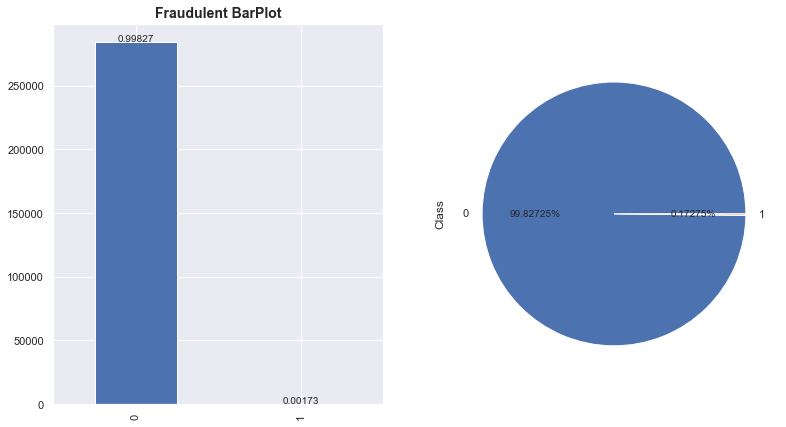

In [15]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title('Fraudulent BarPlot', fontweight='bold',fontsize=14)
ax = df_card['Class'].value_counts().plot(kind='bar')
total = float(len(df_card))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.5f}'.format(height/total),
            ha="center") 


plt.subplot(122)
df_card["Class"].value_counts().plot.pie(autopct = "%1.5f%%")
plt.show()

In [16]:
classes=df_card['Class'].value_counts()
normal_share=classes[0]/df_card['Class'].count()*100
fraud_share=classes[1]/df_card['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


In this case based on accuracy evaluating the classification algorithm would not be correct. Since based on accuracy 
evaluation matrix each record to be 0 and hence non fradulent which is wrong

[None, None, None, None]

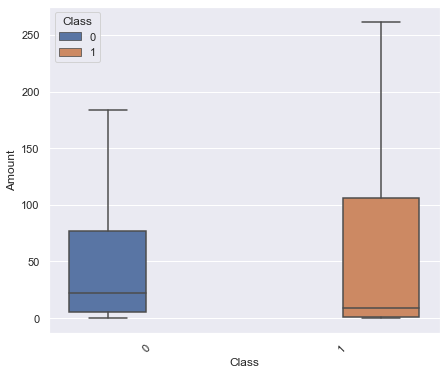

In [17]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df_card,showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=45)

Text(0, 0.5, 'Density')

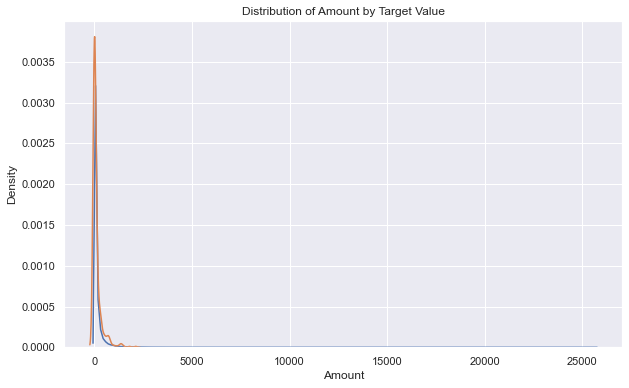

In [18]:
# KDE plot to visualize the distribution of Amount for both the classes
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(df_card.loc[df_card['Class'] == 0, 'Amount'], label = 'Non Fraud')
sns.kdeplot(df_card.loc[df_card['Class'] == 1, 'Amount'], label = 'Fraud')
plt.title('Distribution of Amount by Target Value')
plt.xlabel('Amount')
plt.ylabel('Density')

#Inference: The distribution of fradulent transaction is much higher then the non fradulent transaction

<AxesSubplot:title={'center':'Distribution of Transaction Time'}, ylabel='Density'>

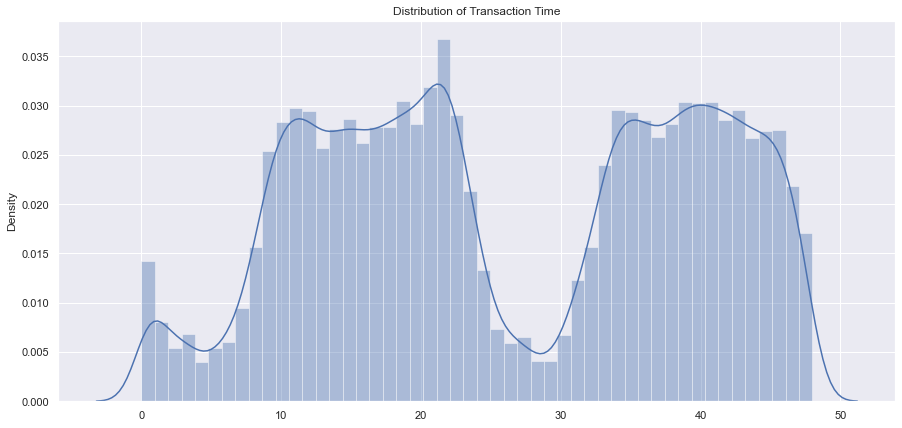

In [19]:
# Time Distribution plot for transactions 

plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df_card['Time'].values/(60*60))

In [20]:
# Storing Fraud and non-Fraud transactions 

df_nonfraud = df_card[df_card.Class == 0]
df_fraud = df_card[df_card.Class == 1]

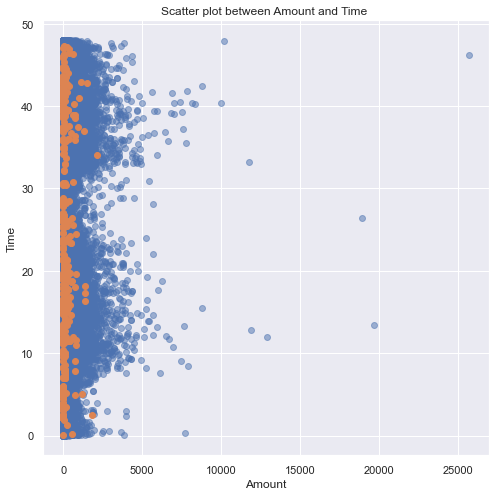

In [21]:
#Scatter plot between Time and Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Amount, df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Amount, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.show()

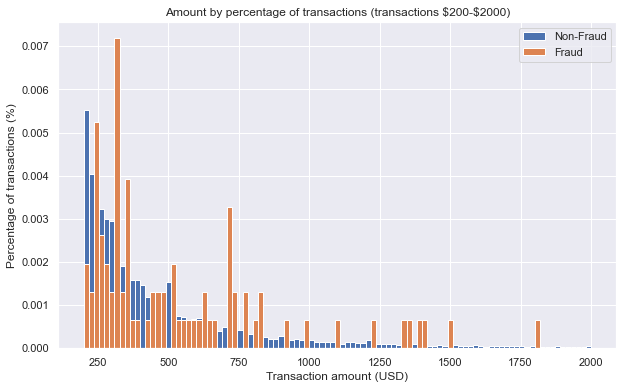

In [22]:
# Plot of high value transactions($200-$2000)

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Inference: In long tail, fradulent transactions happened frequently
It looks difficult to differentiate fraud from normal transactions by transaction amount alone.

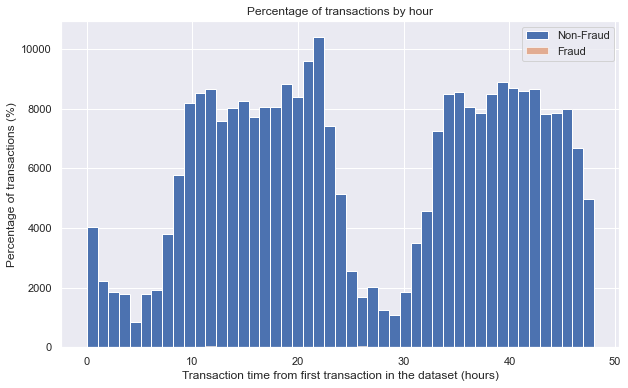

In [23]:
# Plot of transactions in 48 hours

bins = np.linspace(0, 48, 48)
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1,label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6,label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Inference:
Hour zero corresponds to the hour the first transaction happened and not necessarily 12-1 AM. Given the heavy decrease 
in normal transactions from hours 1 to 8 and again roughly at hours 24 to 32, it seems fraud tends to occur at higher 
rates during the night.

# Step 4: Train-Test Split of the data

In [24]:
# Putting the feature variable into X

X = df_card.drop(['Class'],axis = 1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900


In [25]:
# Putting the Target variable to y

y = df_card['Class']

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
# Splitting the data into Train and Test set
kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc, X.iloc
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


Text(0, 0.5, 'Count')

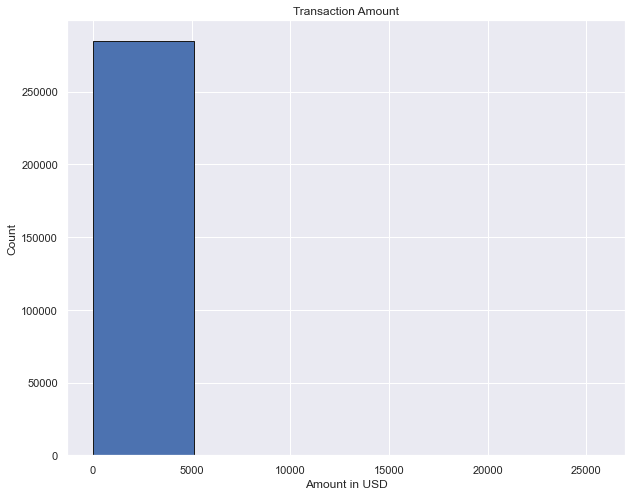

In [28]:
# Checking Skewness of data

plt.rcParams['figure.figsize'] = [10,8]
plt.hist(df_card['Amount'],edgecolor='k',bins = 5)
plt.title('Transaction Amount')
plt.xlabel('Amount in USD') 
plt.ylabel('Count')

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

In [30]:
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)

# Step5: Building Logistic Model

For this scenario, more than accuracy the more focus would be recall score,as this will try to capture the fradulent transaction. Increase of Recall comes at a price of Precision. In this case predicting a transaction fradulant which actually is not is not a big concern.


IMBALANCED DATA SET

Model 1: LOGISTIC REGRESSION ON IMBALANCED DATA SET

In [31]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform

kfold = 4
sss = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=9487)
for train_index, test_index in sss.split(PWTR_X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = PWTR_X[train_index], PWTR_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

TRAIN: [129141  91689 118805 ... 249655  69488 188068] TEST: [ 32603  71580 144362 ... 120664 260883 146701]
TRAIN: [179661 129498 253513 ... 261021 275137 199709] TEST: [ 30193  96420  28988 ... 159837 243770  87245]
TRAIN: [ 55609 250907 105943 ...  96700  41174 261733] TEST: [ 97330 182828 138896 ... 103047 280031 252278]
TRAIN: [160541 270383   7914 ... 119570 142561 116811] TEST: [199984 152508 204491 ... 203781  88156  52492]


In [32]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predict on test data
y_predicted = model_lr.predict(X_test)

In [34]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.60      0.71       148

    accuracy                           1.00     85443
   macro avg       0.93      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   59    89]]
Logistic Regression Accuracy:  0.999133925541004
ROC AUC :  0.8005877455508148


In [35]:
# Function for roc_curve

def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [36]:
# tpr and fpr

fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

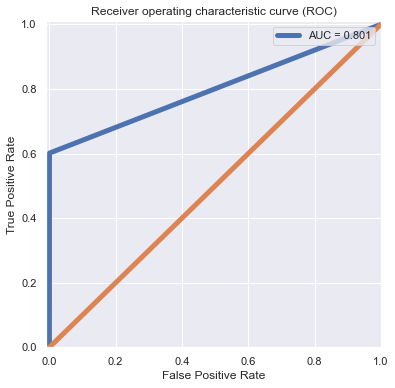

In [37]:
# Plotting the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

# Inference
Recall: 0.60
Precision: 0.86
F1-score: 0.70
Accuracy: 0.85
ROC AUC: 0.80

# HyperParameter Tuning Logistic Regression

# Model 2: Logistic Regression on Imbalanced Dataset with K-Fold and Hypertuning

In [38]:
# conda install -c conda-forge imbalanced-learn

In [39]:
# pip install delayed

In [40]:
# from imblearn.metrics import sensitivity_specificity_support

In [41]:
# Number of folds

n_folds = 5
# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

lrh = LogisticRegression()

model_lrh = GridSearchCV(estimator=lrh, cv=n_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [42]:
# Fitting the model

model_lrh.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [43]:
pd.DataFrame(model_lrh.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0601,0.0126,0.0000,0.0000,0.1000,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,1.2363,0.1042,0.0221,0.0079,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9696,0.9926,0.9882,0.9777,0.9740,0.9804,0.0086,1
2,0.0534,0.0076,0.0000,0.0000,0.5000,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,1.4431,0.1335,0.0314,0.0002,0.5000,l2,"{'C': 0.5, 'penalty': 'l2'}",0.9700,0.9921,0.9864,0.9776,0.9734,0.9799,0.0082,2
4,0.0692,0.0125,0.0000,0.0000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
5,1.5965,0.1362,0.0362,0.0136,1,l2,"{'C': 1, 'penalty': 'l2'}",0.9701,0.9920,0.9861,0.9776,0.9733,0.9798,0.0081,3
6,0.0713,0.0129,0.0000,0.0000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
7,1.5982,0.1001,0.0295,0.0023,2,l2,"{'C': 2, 'penalty': 'l2'}",0.9701,0.9920,0.9860,0.9776,0.9732,0.9798,0.0081,4
8,0.0690,0.0076,0.0000,0.0000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,1.4979,0.1000,0.0188,0.0062,3,l2,"{'C': 3, 'penalty': 'l2'}",0.9702,0.9920,0.9859,0.9776,0.9732,0.9798,0.0081,5


In [44]:
print("Logistic Regression with PCA Best AUC : ", model_lrh.best_score_)
print("Logistic Regression with PCA Best hyperparameters: ", model_lrh.best_params_)

Logistic Regression with PCA Best AUC :  0.9804184472371569
Logistic Regression with PCA Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [45]:
# Passing the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=0.1)

In [46]:
# Predicting on test data

model_lrh_tuned.fit(X_train,y_train)
y_predicted = model_lrh_tuned.predict(X_test)

In [47]:
#Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85280    15]
 [   61    87]]
Logistic Regression Accuracy:  0.9991105181231933
ROC AUC :  0.7938309887940581


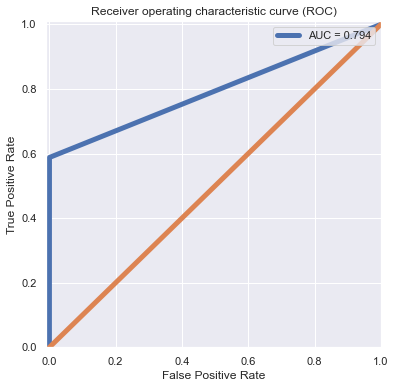

In [48]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

# Inference
# Precision : 0.85
# Recall : 0.59
# F1-score : 0.70
# Accuracy : 0.99
# ROC AUC : 0.79

# Model 3: Random Forest on Imbalanced Data Set

In [49]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [ ]:
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train,y_train)
y_predicted = model_rfc.predict(X_test)

In [ ]:
# Evaluation Metrics

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

Inference:
Precision : 0.94
Recall : 0.70
F1-score : 0.80
Accuracy : 0.99
ROC AUC : 0.85

Hyperparameter Tuning Random Forest


Model 4 : Random Forest on Imbalanced Data with K-Fold and Hyperparamater Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Defining Parameters
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train, y_train)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [ ]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='gini',
                               max_depth=5,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=200,
                               n_jobs=-1, 
                               random_state=5)

In [ ]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_train,y_train)
y_predicted = model_rfc_tuned.predict(X_test)

In [ ]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

Inference:
Precision : 0.81
Recall : 0.71
F1-score : 0.76
Accuracy : 0.99
ROC AUC : 0.85

XG Boost


Model 5 : XG Boost on Imbalanced Data

In [ ]:
#Initializing Random forest and creating model
model_xgb = XGBClassifier()

In [ ]:
# Fitting the model on Train data and Predicting on Test data
model_xgb.fit(X_train,y_train)
y_predicted = model_xgb.predict(X_test)

In [ ]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

Inference:
Precision : 0.95
Recall : 0.74
F1-score : 0.83
Accuracy : 0.99
ROC AUC : 0.87

Hyperparameter Tuning XGB


Model 6 : XGB on Imbalanced Data with K-Fold and Hyperparamater Tuning

In [ ]:
# Defining parameters
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, y_train)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [ ]:
# Fitting the model on train data
#xgb_random.fit(X_train, y_train)

In [ ]:
# scores of RandomizedSearchCV
#scores = xgb_random.cv_results_
#pd.DataFrame(scores).head()

In [ ]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [ ]:
# Fitting the model on Train data and Predicting on Test data
model_xgb_tuned.fit(X_train,y_train)
y_predicted = model_xgb_tuned.predict(X_test)

In [ ]:
# Evaluation metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

Inference:

Precision : 0.95
Recall : 0.72
F1-score : 0.82
Accuracy : 0.99
ROC AUC : 0.85

Balanced Data Set

In [ ]:
from imblearn.metrics import sensitivity_specificity_support

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Resample training data
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
adasyn = ADASYN(random_state=5)

X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_sample(X_train,y_train)

Logistic Regression


Model 7 : Logistic Regression on ROS Balanced Data

In [ ]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_ros, y_train_ros)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

Inference:

Precision : 0.06
Recall : 0.91
F1-score : 0.11
Accuracy : 0.97
ROC AUC : 0.94

Model 8 : Logistic Regression on SMOTE Balanced Data¶

In [ ]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

In [ ]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)


Inference:

Precision : 0.06
Recall : 0.91
F1-score : 0.11
Accuracy : 0.97
ROC AUC : 0.93

Model 9 : Logistic Regression on ADASYN Balanced Data

In [ ]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_adasyn, y_train_adasyn)

# Obtain model predictions
y_predicted = model_lr.predict(X_test)

In [ ]:
# Evaluation Metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:
Precision : 0.02
Recall : 0.91
F1-score : 0.04
Accuracy : 0.91
ROC AUC : 0.91


Random Forest


Model 10 : Random Forest on ROS Balanced Data

In [ ]:
# Insantiate Model
model_rfc = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

In [ ]:
# Fit the model on train data and predict on test data 

model_rfc.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc.predict(X_test)

In [ ]:
# Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:

Precision : 0.46
Recall : 0.79
F1-score : 0.58
Accuracy : 0.99
ROC AUC : 0.89

Model 11 : Random Forest on SMOTE Balanced Data

In [ ]:
# Fit the model on train data and predict on test data 

model_rfc.fit(X_train_smote,y_train_smote)
y_predicted = model_rfc.predict(X_test)

In [ ]:
# Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:

Precision : 0.06
Recall : 0.84
F1-score : 0.12
Accuracy : 0.97
ROC AUC : 0.91

Model 12 : Random Forest on ADASYN Balanced Data

In [ ]:
# Fit the model on train data and predict on test data 

model_rfc.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_rfc.predict(X_test)

In [ ]:
# Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:

Precision : 0.03
Recall : 0.84
F1-score : 0.06
Accuracy : 0.95
ROC AUC : 0.89

Let's do a Hyperparameter tuning on ROS data as it gave a better Recall and Precision

Hyperparameter Tuning Random Forest on ROS Data

Model 13 : Hyper Tuning model Random Forest on ROS Balanced Data

In [ ]:
params = { 
    'n_estimators': [200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train_ros, y_train_ros)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [ ]:
# Insanitiate Model on best params
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=8, 
                               max_features='auto',
                               n_estimators=200,
                               n_jobs=-1)

In [ ]:
#Fit the model on train data and predict the model on test data
model_rfc_tuned.fit(X_train_ros,y_train_ros)
y_predicted = model_rfc_tuned.predict(X_test)

In [ ]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:
    Precision : 0.20
    Recall : 0.79
    F1-score : 0.32
    Accuracy : 0.99
    ROC AUC : 0.89

XG Boost


Model 14 : XGB on ROS Balanced Data

In [ ]:
model_xgb_ros = XGBClassifier()

In [ ]:
#Fit the model on train data and predict the model on test data
model_xgb_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_ros.predict(X_test)

In [ ]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:
       Precision : 0.92
       Recall : 0.78
       F1-score : 0.84
       Accuracy : 0.99
       ROC AUC : 0.88

Hyperparameter Tuning on ROS Balanced data


Model 15 : Hyper Tuning XGB on ROS Balanced Data

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
cross_val = StratifiedKFold(n_splits=4)
index_iterator = cross_val.split(X_train_ros, y_train_ros)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [ ]:
model_xgb_tuned_ros = XGBClassifier(min_child_weight= 5,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [ ]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_ros.fit(X_train_ros,y_train_ros)
y_predicted = model_xgb_tuned_ros.predict(X_test)

In [ ]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:
    Precision : 0.91
    Recall : 0.76
    F1-score : 0.83
    Accuracy : 0.99
    ROC AUC : 0.87

Model 16 : XGB on SMOTE Balanced Data

In [ ]:
model_xgb_smote = XGBClassifier()

In [ ]:
#Fit the model on train data and predict the model on test data
model_xgb_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_smote.predict(X_test)

In [ ]:
# Evaluation Metrices

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:
    Precision : 0.82
    Recall : 0.76
    F1-score : 0.79
    Accuracy : 0.99
    ROC AUC : 0.88

Hyperparameter Tuning on Smote Balanced data

Model 17 : Hyper Tuning XGB on SMOTE Balanced Data

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5,8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,1.2],
        'max_depth': [3, 4, 5,6,7]
        }

In [ ]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_smote, y_train_smote)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =40 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [ ]:
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [ ]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted = model_xgb_tuned.predict(X_test)

In [ ]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:
Precision : 0.95
Recall : 0.72
F1-score : 0.82
Accuracy : 0.99
ROC AUC : 0.85

Model 18 : XGB on ADASYN Balanced Data

In [ ]:
model_xgb_adasyn = XGBClassifier()

In [ ]:
#Fit the model on train data and predict the model on test data
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_adasyn.predict(X_test)

In [ ]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:

Precision : 0.76
Recall : 0.76
F1-score : 0.76
Accuracy : 0.99
ROC AUC : 0.87

Model 19: Hyperparameter Tuning on Adasyn Balanced data

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train_adasyn, y_train_adasyn)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =30 , cv = cross_val,
                                verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

In [ ]:
model_xgb_tuned_adasyn = XGBClassifier(min_child_weight= 10,
        gamma= 1.5,
        subsample= 0.6,
        colsample_bytree= 0.6,
        max_depth= 5)

In [ ]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_xgb_tuned_adasyn.predict(X_test)

In [ ]:
#Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Inference:

Precision : 0.54
Recall : 0.77
F1-score : 0.64
Accuracy : 0.99
ROC AUC : 0.88

# Final Analysis

Best Model considering various parameters and scenarios


In nutshell rather than aiming for overall accuracy on the entire dataset, we cared more about detecting most of the fraud cases (recall), whilst keeping the cost at which this is achieved under control (precision).We have applied XGBoost on Smote data and got the best evaluation metrices.

In [ ]:
#Predicting on the test data using the best model

y_predicted = model_xgb_smote.predict(X_test)

In [ ]:
# Create true and false positive rates

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

In [ ]:
# Printing Evaluation Metrices

print('Classification report for XGBoost Smote:\n', classification_report(y_test, y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold:",threshold)

In [ ]:
# Plotting the roc curve 

plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

Inference:

Precision : 0.82
Recall : 0.76
F1-score : 0.79
Accuracy : 0.99
ROC AUC : 0.88

Important Features

In [ ]:
target = 'Class'
pca_comp = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount', 'Time']

In [ ]:
tmp = pd.DataFrame({'Feature': pca_comp, 'Feature importance': model_xgb_smote.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

Inference:

We found out that PCA converted variables like V5, V15 are able to explain the maximum variance and hence we can target these variables to detect a fraud.

# Step 7: Closing Statement

We have build a logistic regression model based on the transaction data provided to us.
The data provided to us was very imbalanced data set. Hence, for building a proper logistic model on top of that we have used some balancing techniques like (ROS,SMOTE etc) to balance the data and applied some of very popular logistic regression models like Random Forest, Logistic regression and some boosting techniques like XGBoost to catch any frud transactions.
In our scenario Accuracy was not a concerning Evaluation criteria and we focussed more on Recall and AUC.
We finally able to build a proper logistic model and predicted on test data and the results were satisfying.
We were also able to figure out the variables which will be important in detecting any fraud transactions